In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Momentum based gradient descent
1. Optimization algorithm used in back propagation for training a neural network. 
2. It is an extension of the basic gradient descent algorithm that helps accelerate convergence, especially in the presence of high curvature.<br>
3. Along with the gradient of current time step, it also take into account of the gradient informatio of previous time steps. <br> 
The momentum for the time step t+1 is calculated as<br>
$$
    v_{t+1} = \beta v_{t} + (1-\beta)\nabla J(\theta_t)
$$
4. Update rule is given by
$$
    \theta_{t+1} = \theta_{t} - \alpha v_{t+1}\\
    \text{instead of } \\
    \theta_{t+1} = \theta_{t} - \alpha J(\theta_t)
$$
5. $\beta$ is a hyperparameter between 0 to 1, a typical value is 0.9.  We can see by expanding the value of $v_{t}$ that it is an weighted sum<br>
of previous gradient values. The much further gradient values are given lesser weights as compared to recent gradients.<br>
**Problems**
1. The gradients values are used to speed up the process oc achieving minima value (local/ global). This increase in speed may lead to<br>
oveshooting from the minima region which result in oscillation around the region of minima.
2. nestrov momentum based GD somehow tries to solve the problem.

# Nestrov accelerated GD
The oscillationg convergence problem of momentum GD is partially solved using Netrov GD.
1. This method is also called look before you leap. Instead of calculating the gradient at $x_t$, we calculate the gradient at<br>
    x = $x_t-\beta v_{t-1}$. The updated rule mean based on the current momentum we will first calculate the next possible value of x<br>
    ie $x_t-\beta v_{t-1}$ and calculate gradient at that value instead of x.
2. By doing so we restrict from making a very high jump based on current momentum reducing the oscillation.
3. Ref: [https://youtu.be/dIYDPtHWBNA?list=PLZ2ps__7DhBZVxMrSkTIcG6zZBDKUXCnM&t=462] 

In [2]:
"""
Testing the above algorithm for a simple optimization problem.
The purpose is to demonstrate the working of various gradient descent algorithms.
For the purpose we assue that the
    - loss function is given by loss(x) = x**2 + x
    - the corresponding gradients grad(loss(x)) = 2*x + 1
    - range of x = [-2, 2]
    - starting value of x = -2
    - learning rate = 0.1
    - momentum = 0.9
To compare various we will use the following criteria
    - with each successive iteration, how much improvement did we get?
    - what is the current value of x?
"""
np.random.seed(42)
x = np.random.uniform(-2, 2, 100) # domain
y = x**2        # loss
grad_y = 2*x    # gradient values

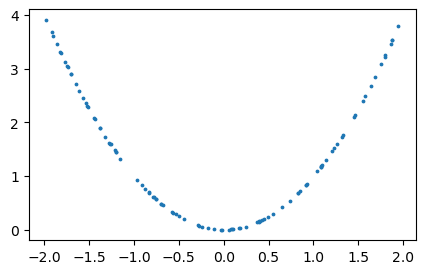

In [3]:
# Set the figure size
plt.figure(figsize=(5, 3))  # Adjust the size as needed
plt.scatter(x, y, s=3)

In [4]:
beta = 0.9          # Momentum
n_iter = 100        # Number of iterations

In [5]:
def find_loss(x):
    out = x**2
    return out

def find_gradient(x):
    out = 2*x
    return out

In [6]:
# Implementation of basic gradient descent
def basic_gradient_descent(x0=-2, lr=0.1, n_iter=100):
    """
    x0: Initial value of x.
    lr: learning rate.
    n_iter: No. of iteration.
    """
    losses = np.zeros(n_iter)   # To store the loss at each iteration
    xs = np.zeros(n_iter)       # To store the value of y at each iteration
    x = x0
    for i in range(n_iter):
        x = x - lr * find_gradient(x)
        loss = find_loss(x)
        losses[i] = loss
        xs[i] = x

    losses_out = np.array(losses)
    xs_out = np.array(xs)
    return losses_out, xs_out

In [7]:
# Implementation of momentum based gradient descent
def momentum_gradient_descent(x0=-2, lr=0.1, beta=0.9, n_iter=100):
    """
    x0: Initial value of x.
    lr: learning rate.
    beta: Momentum value.
    n_iter: No. of iteration.
    """
    losses = np.zeros(n_iter)   # To store the loss at each iteration
    xs = np.zeros(n_iter)       # To store the value of y at each iteration
    x = x0
    v = 0
    for i in range(n_iter):
        v = beta * v + (1-beta) * find_gradient(x)
        x = x - lr * v
        loss = find_loss(x)
        losses[i] = loss
        xs[i] = x

    losses_out = np.array(losses)
    xs_out = np.array(xs)
    return losses_out, xs_out

In [8]:
# Implementation of momentum based gradient descent
def nestrov_accelerated_gradient_descent(x0=-2, lr=0.1, beta=0.9, n_iter=100):
    """
    x0: Initial value of x.
    lr: learning rate.
    beta: Momentum value.
    n_iter: No. of iteration.
    """
    losses = np.zeros(n_iter)   # To store the loss at each iteration
    xs = np.zeros(n_iter)       # To store the value of y at each iteration
    x = x0
    v = 0
    for i in range(n_iter):
        v = beta * v + (1-beta) * find_gradient(x-beta*v)
        x = x - lr * v
        loss = find_loss(x)
        losses[i] = loss
        xs[i] = x

    losses_out = np.array(losses)
    xs_out = np.array(xs)
    return losses_out, xs_out

In [12]:
n_iter = 100
loss_basic_gd, x_basic_gd = basic_gradient_descent()
loss_momentum_gd, x_momentum_gd = momentum_gradient_descent()
loss_accelerated_gd, x_accelerated_gd = nestrov_accelerated_gradient_descent()

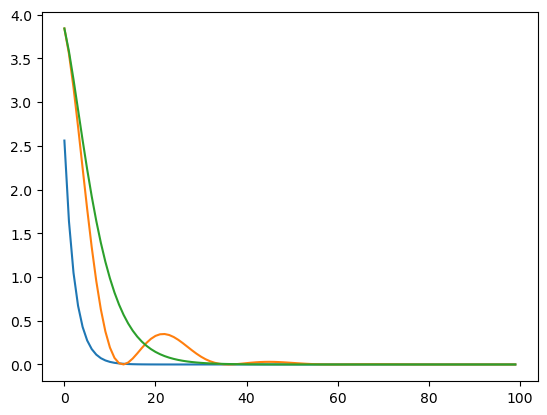

In [10]:
# plt.scatter(x, y, s=3)
plt.plot(np.arange(n_iter), loss_basic_gd)          # No oscillation
plt.plot(np.arange(n_iter), loss_momentum_gd)       # High oscillation
plt.plot(np.arange(n_iter), loss_accelerated_gd)    # Very little oscillation

In [55]:
x_basic_gd[-20:]

array([-0.17179869, -0.13743895, -0.10995116, -0.08796093, -0.07036874,
       -0.056295  , -0.045036  , -0.0360288 , -0.02882304, -0.02305843,
       -0.01844674, -0.0147574 , -0.01180592, -0.00944473, -0.00755579,
       -0.00604463, -0.0048357 , -0.00386856, -0.00309485, -0.00247588])